In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
bank=pd.read_csv("bank-full.csv",sep = ';')

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#converting categorical data to numerical form

In [5]:
bank["job"]=bank["job"].astype("category")

In [6]:
bank["job"]=bank["job"].cat.codes

In [7]:
bank["marital"]=bank["marital"].astype("category")
bank["marital"]=bank["marital"].cat.codes

In [8]:
bank["education"]=bank["education"].astype("category")
bank["education"]=bank["education"].cat.codes

In [9]:
bank["default"]=bank["default"].astype("category")
bank["default"]=bank["default"].cat.codes

In [10]:
bank["housing"] = bank["housing"].astype('category')
bank["housing"] = bank["housing"].cat.codes

bank["loan"] = bank["loan"].astype('category')
bank["loan"] = bank["loan"].cat.codes

bank["contact"] = bank["contact"].astype('category')
bank["contact"] = bank["contact"].cat.codes

bank["month"] = bank["month"].astype('category')
bank["month"] = bank["month"].cat.codes

bank["poutcome"] = bank["poutcome"].astype('category')
bank["poutcome"] = bank["poutcome"].cat.codes

bank["y"] = bank["y"].astype('category')
bank["y"] = bank["y"].cat.codes

In [30]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int64
 10  month      45211 non-null  int8 
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int8 
 16  y          45211 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


In [11]:
bank.shape

(45211, 17)

In [13]:
bank.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')>

In [15]:
X=bank.iloc[:,1:15]

In [16]:
Y=bank.iloc[:,16]

In [17]:
classifier=LogisticRegression()

In [18]:
classifier.fit(X,Y)

C:\Users\Anwesha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred=classifier.predict(X)

In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [21]:
y_pred_df=pd.DataFrame({'Actual':Y,'predicted':y_pred})

In [22]:
y_pred_df

,Actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [23]:
#Now to analyze we have to compute the confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix=confusion_matrix(Y,y_pred)

In [28]:
print(confusion_matrix)

[[39130   792]
 [ 4331   958]]


In [34]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.55      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.72      0.58      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [35]:
from sklearn import metrics

In [36]:
print('Accuracy: ',metrics.accuracy_score(Y, y_pred))  # Accuracy

Accuracy:  0.8866868682400301


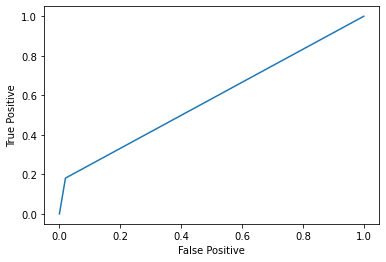

0.5806459815395931


In [37]:
fpr, tpr, threshold = metrics.roc_curve(bank.y, y_pred)

# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
plt.show()
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 
print(roc_auc)